#**1.Teaching materials for AI beginners.**  
##Number recognition  
Even beginners can immediately experience AI.  
This code allows you to study learning and inference using the mnist dataset.  
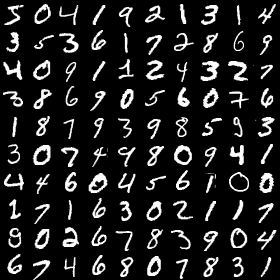

##mnist dataset  
60,000 pieces of training data (images and labels)  
10,000 pieces of test data (images and labels)  
70,000 total  
Data for AI beginners.

## **2.GPU status**

In [1]:
!nvidia-smi

Thu Oct 15 09:39:58 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#**3.mnist training code**  
##Loading the required libraries

In [2]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import os
import numpy as np
import random
import sys
from PIL import Image
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model as plot

##The name of the model and the path to save it.

In [3]:
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_mnist_trained_model.h5'

##Let's check what kind of data it is.  
28 x 28 pixels

11493376/11490434 [==============================] - 0s 0us/step
train_label(y_train) ＝ 7
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 115 121 162 253 253 213 000 000 000 000 000 000 000 
000 00

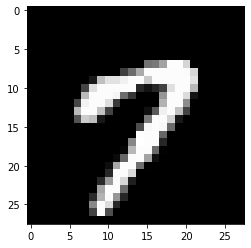

In [4]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

train_no = random.randint(0, 100)
 
print('train_label(y_train) ＝ %d' % y_train[train_no])

for xs in x_train[train_no]:
    for x in xs:
        sys.stdout.write('%03d ' % x)
    sys.stdout.write('\n')

outImg = Image.fromarray(x_train[train_no].reshape((28,28))).convert("RGB")
plt.imshow(np.array(outImg))

##CNN model

In [5]:
def build_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    
    return model

##Training status history

In [6]:
def plot_history(history):
    # accuracy
    plt.plot(history.history['accuracy'],"o-",label="accuracy")
    plt.plot(history.history['val_accuracy'],"o-",label="val_acc")
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(loc="lower right")
    plt.show()
 
    # loss
    plt.plot(history.history['loss'],"o-",label="loss",)
    plt.plot(history.history['val_loss'],"o-",label="val_loss")
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(loc='lower right')
    plt.show()

##Training start

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/100
469/469 [==============================] - 3s 7ms/step - loss: 2.2910 - accuracy: 0.1303 - val_loss: 2.2634 - val_accuracy: 0.2525
Epoch 2/100
469/469 [==============================] - 3s 6ms/step - loss: 2.2473 - accuracy: 0.2222 - val_loss: 2.2110 - val_accuracy: 0.4373
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 2.1927 - accuracy: 0.3261 - val_loss: 2.1421 - val_accuracy: 0.5581
Epoch 4/100
469/469 [==============================] - 3s 6ms/step - loss: 2.1197 - accuracy: 0.4052 - val_loss: 2.0483 - val_accuracy: 0.6451
Epoch 5/100
469/469 [==============================] - 3s 6ms/step - loss: 2.0201 - accuracy: 0.4702 - val_loss: 1.9211 - val_accuracy: 0.6993
Epoch 6/100
469/469 [==============================] - 3s 6ms/step - loss: 1.8903 - accuracy: 0.5185 - val_loss: 1.7562 - val_accuracy: 0.7398
Epoch 7/100
469/469 [==============================] - 3s 6ms/step - 

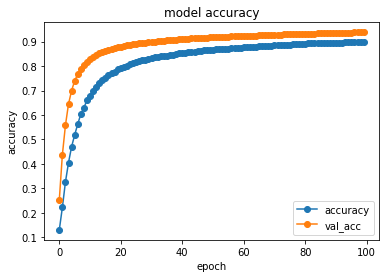

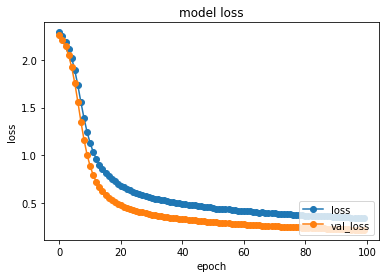

Test loss: 0.21393582224845886
Test accuracy: 0.9380999803543091


In [7]:
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

batch_size = 128
num_classes = 10
epochs = 100

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = build_model()

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)

# Training status history
plot_history(history)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

#**4.Save of training model**

In [8]:
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)

#**5.predict code**  
##Upload the image you want to predict.  
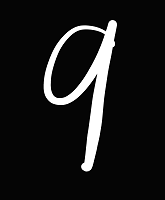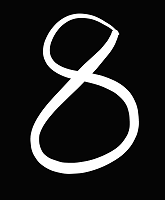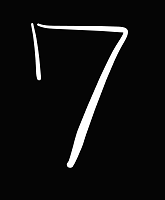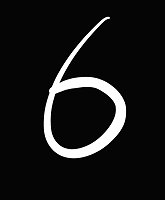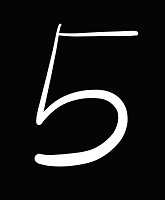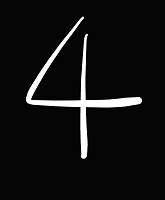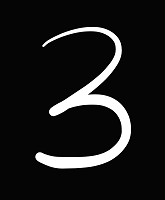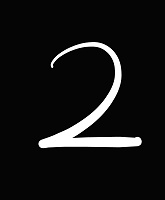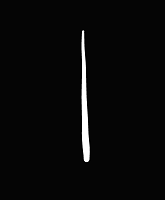

In [26]:
from google.colab import files
uploaded = files.upload()

Saving 4.png to 4.png


##Number recognition

In [27]:
import re
from keras.models import load_model
from keras.preprocessing.image import array_to_img, img_to_array,load_img

model = load_model('./saved_models/keras_mnist_trained_model.h5')

def list_pictures(directory, ext='jpg|jpeg|bmp|png|ppm'):
    return [os.path.join(root, f)
            for root, _, files in os.walk(directory) for f in files
            if re.match(r'([\w]+\.(?:' + ext + '))', f.lower())]

for picture in list_pictures('./'):
    X = []
    img = img_to_array(
        load_img(picture, target_size=(28, 28), grayscale=True))
    X.append(img)

    X = np.asarray(X)
    X = X.astype('float32')
    X = X / 255.0

    features = model.predict(X)
    
    print('----------')
    print(picture,'→',features.argmax())

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


----------
./1.png → 1
----------
./7.png → 1
----------
./3.png → 3
----------
./4.png → 4
----------
./6.png → 6
----------
./8.png → 3
----------
./5.png → 6
----------
./9.png → 4
----------
./2.png → 2
